In [53]:
import requests

# Get series information for KXNFLGAME

series = 'KXNFLGAME'
url = f"https://api.elections.kalshi.com/trade-api/v2/series/{series}"
response = requests.get(url)
series_data = response.json()

print(f"Series Title: {series_data['series']['title']}")
print(f"Frequency: {series_data['series']['frequency']}")
print(f"Category: {series_data['series']['category']}")

Series Title: Professional Football Game
Frequency: custom
Category: Sports


In [54]:
# Get all markets for the KXNFLGAME series
markets_url = f"https://api.elections.kalshi.com/trade-api/v2/markets?series_ticker={series}&status=open"
markets_response = requests.get(markets_url)
markets_data = markets_response.json()

print(f"\nActive markets in {series} series:")
for market in markets_data['markets']:
    print(f"- {market['ticker']}: {market['title']}")
    print(f"  Event: {market['event_ticker']}")
    print(f"  Yes Ask Price: {market['yes_ask']}¢ | Volume: {market['volume']}")
    print()



Active markets in KXNFLGAME series:
- KXNFLGAME-26JAN10GBCHI-GB: Green Bay at Chicago Winner?
  Event: KXNFLGAME-26JAN10GBCHI
  Yes Ask Price: 51¢ | Volume: 92900

- KXNFLGAME-26JAN10GBCHI-CHI: Green Bay at Chicago Winner?
  Event: KXNFLGAME-26JAN10GBCHI
  Yes Ask Price: 50¢ | Volume: 207359

- KXNFLGAME-26JAN10LACAR-LA: Los Angeles R at Carolina Winner?
  Event: KXNFLGAME-26JAN10LACAR
  Yes Ask Price: 83¢ | Volume: 151711

- KXNFLGAME-26JAN10LACAR-CAR: Los Angeles R at Carolina Winner?
  Event: KXNFLGAME-26JAN10LACAR
  Yes Ask Price: 18¢ | Volume: 304334

- KXNFLGAME-26JAN11LACNE-NE: Los Angeles C at New England Winner?
  Event: KXNFLGAME-26JAN11LACNE
  Yes Ask Price: 65¢ | Volume: 168989

- KXNFLGAME-26JAN11LACNE-LAC: Los Angeles C at New England Winner?
  Event: KXNFLGAME-26JAN11LACNE
  Yes Ask Price: 36¢ | Volume: 106209

- KXNFLGAME-26JAN11SFPHI-SF: San Francisco at Philadelphia Winner?
  Event: KXNFLGAME-26JAN11SFPHI
  Yes Ask Price: 34¢ | Volume: 263210

- KXNFLGAME-26JAN11SFPH

In [55]:
# Get orderbook for a specific market
# Replace with an actual market ticker from the markets list
market_ticker = markets_data['markets'][0]['ticker']
orderbook_url = f"https://api.elections.kalshi.com/trade-api/v2/markets/{market_ticker}/orderbook"

orderbook_response = requests.get(orderbook_url)
orderbook_data = orderbook_response.json()

print(f"\nOrderbook for {market_ticker}:")
print("YES BIDS:")
for bid in orderbook_data['orderbook']['yes'][:5]:  # Show top 5
    print(f"  Price: {bid[0]}¢, Quantity: {bid[1]}")

print("\nNO BIDS:")
for bid in orderbook_data['orderbook']['no'][:5]:  # Show top 5
    print(f"  Price: {bid[0]}¢, Quantity: {bid[1]}")


Orderbook for KXNFLGAME-26JAN10GBCHI-GB:
YES BIDS:
  Price: 1¢, Quantity: 3242317
  Price: 2¢, Quantity: 9750
  Price: 3¢, Quantity: 511806
  Price: 4¢, Quantity: 500
  Price: 5¢, Quantity: 306653

NO BIDS:
  Price: 1¢, Quantity: 3240918
  Price: 2¢, Quantity: 9750
  Price: 3¢, Quantity: 511905
  Price: 4¢, Quantity: 500
  Price: 5¢, Quantity: 306709


In [56]:
(markets_data['markets'][0]['ticker'], markets_data['markets'][1]['ticker'])

('KXNFLGAME-26JAN10GBCHI-GB', 'KXNFLGAME-26JAN10GBCHI-CHI')

In [57]:
import requests

# Fetch both orderbooks for the same game
gb_ticker = "KXNFLGAME-26JAN10GBCHI-GB"
chi_ticker = "KXNFLGAME-26JAN10GBCHI-CHI"

gb_book = requests.get(f"https://api.elections.kalshi.com/trade-api/v2/markets/{gb_ticker}/orderbook").json()['orderbook']
chi_book = requests.get(f"https://api.elections.kalshi.com/trade-api/v2/markets/{chi_ticker}/orderbook").json()['orderbook']

print("GB YES bids (top 5):")
for price, qty in gb_book['yes'][:5]:
    print(f"  {price}¢: {qty:,}")

print("\nCHI NO bids (top 5) - should mirror GB YES:")
for price, qty in chi_book['no'][:5]:
    print(f"  {price}¢: {qty:,}")

print("\n" + "="*50)
print("Checking if GB YES @ X¢ == CHI NO @ X¢")
print("="*50)

# Convert to dicts for easy comparison
gb_yes = {p: q for p, q in gb_book['yes']}
chi_no = {p: q for p, q in chi_book['no']}

# Check a few price points
for price in [1, 5, 10, 25, 50]:
    gb_qty = gb_yes.get(price, 0)
    chi_qty = chi_no.get(price, 0)
    match = "✓" if gb_qty == chi_qty else "✗"
    print(f"  {price}¢: GB YES={gb_qty:,} | CHI NO={chi_qty:,} {match}")

GB YES bids (top 5):
  1¢: 3,242,317
  2¢: 9,750
  3¢: 511,806
  4¢: 500
  5¢: 306,653

CHI NO bids (top 5) - should mirror GB YES:
  1¢: 3,241,918
  2¢: 9,750
  3¢: 511,905
  4¢: 500
  5¢: 306,709

Checking if GB YES @ X¢ == CHI NO @ X¢
  1¢: GB YES=3,242,317 | CHI NO=3,241,918 ✗
  5¢: GB YES=306,653 | CHI NO=306,709 ✗
  10¢: GB YES=0 | CHI NO=0 ✓
  25¢: GB YES=16,666 | CHI NO=16,674 ✗
  50¢: GB YES=10,835 | CHI NO=111,500 ✗


In [58]:
print("Full comparison - are these truly mirrored books?")
print("="*60)

# All four sides
gb_yes = {p: q for p, q in gb_book['yes']}
gb_no = {p: q for p, q in gb_book['no']}
chi_yes = {p: q for p, q in chi_book['yes']}
chi_no = {p: q for p, q in chi_book['no']}

# Get all prices across all books
all_prices = sorted(set(gb_yes.keys()) | set(gb_no.keys()) | set(chi_yes.keys()) | set(chi_no.keys()))

print(f"\n{'Price':>6} | {'GB YES':>12} {'CHI NO':>12} {'Δ':>8} | {'GB NO':>12} {'CHI YES':>12} {'Δ':>8}")
print("-"*80)

for price in all_prices[:15]:  # First 15 price levels
    gy = gb_yes.get(price, 0)
    cn = chi_no.get(price, 0)
    gn = gb_no.get(price, 0)
    cy = chi_yes.get(price, 0)
    
    d1 = gy - cn
    d2 = gn - cy
    
    print(f"{price:>5}¢ | {gy:>12,} {cn:>12,} {d1:>+8,} | {gn:>12,} {cy:>12,} {d2:>+8,}")

# Also check: do the YES and NO books within each market mirror each other?
print("\n" + "="*60)
print("Within GB market: does YES @ X¢ == NO @ X¢?")
print("="*60)
for price in [1, 5, 25, 50]:
    gy = gb_yes.get(price, 0)
    gn = gb_no.get(price, 0)
    match = "✓" if gy == gn else f"Δ={gy-gn:+,}"
    print(f"  {price}¢: YES={gy:,} | NO={gn:,} {match}")
    

Full comparison - are these truly mirrored books?

 Price |       GB YES       CHI NO        Δ |        GB NO      CHI YES        Δ
--------------------------------------------------------------------------------
    1¢ |    3,242,317    3,241,918     +399 |    3,240,918    3,242,236   -1,318
    2¢ |        9,750        9,750       +0 |        9,750        9,750       +0
    3¢ |      511,806      511,905      -99 |      511,905      511,806      +99
    4¢ |          500          500       +0 |          500          500       +0
    5¢ |      306,653      306,709      -56 |      306,709      306,653      +56
    7¢ |      147,622      147,622       +0 |      147,622      147,622       +0
   10¢ |            0            0       +0 |            0          100     -100
   11¢ |      293,466      293,466       +0 |      293,466      293,466       +0
   12¢ |       40,216       40,216       +0 |       40,216       40,216       +0
   13¢ |       39,716       39,716       +0 |       39,716

In [59]:
print("Price-inverted mirror check: GB YES @ X¢ vs CHI YES @ (100-X)¢")
print("="*60)
print("(These SHOULD be the same bet: 'GB wins')")
print()

for price in [10, 25, 40, 50, 60, 75, 90]:
    inverse = 100 - price
    gy = gb_yes.get(price, 0)
    cy_inv = chi_yes.get(inverse, 0)
    match = "✓" if gy == cy_inv else f"Δ={gy-cy_inv:+,}"
    print(f"  GB YES @{price:>2}¢ = {gy:>10,}  |  CHI YES @{inverse:>2}¢ = {cy_inv:>10,}  {match}")

print()
print("="*60)
print("So for tracking liquidity on 'GB wins', we could combine:")
print("  - GB YES book (direct bets on GB)")  
print("  - CHI NO book (inverse bets against CHI)")
print("These should be ~identical, so just pick one.")

Price-inverted mirror check: GB YES @ X¢ vs CHI YES @ (100-X)¢
(These SHOULD be the same bet: 'GB wins')

  GB YES @10¢ =          0  |  CHI YES @90¢ =          0  ✓
  GB YES @25¢ =     16,666  |  CHI YES @75¢ =          0  Δ=+16,666
  GB YES @40¢ =         15  |  CHI YES @60¢ =          0  Δ=+15
  GB YES @50¢ =     10,835  |  CHI YES @50¢ =          0  Δ=+10,835
  GB YES @60¢ =          0  |  CHI YES @40¢ =        109  Δ=-109
  GB YES @75¢ =          0  |  CHI YES @25¢ =     16,057  Δ=-16,057
  GB YES @90¢ =          0  |  CHI YES @10¢ =        100  Δ=-100

So for tracking liquidity on 'GB wins', we could combine:
  - GB YES book (direct bets on GB)
  - CHI NO book (inverse bets against CHI)
These should be ~identical, so just pick one.


In [60]:
print("What we KNOW matches (from earlier):")
print("  GB YES ≈ CHI NO  (same book)")
print("  GB NO  ≈ CHI YES (same book)")
print()
print("So Kalshi has TWO orderbooks per game, not four:")
print("  Book 1: 'GB wins' = GB YES bids + CHI NO bids") 
print("  Book 2: 'CHI wins' = CHI YES bids + GB NO bids")
print()
print("Let's visualize the ACTUAL liquidity for 'GB wins':")
print("="*60)

# For "GB wins" outcome, buyers are in GB YES, sellers show up as GB NO
# (because selling NO is equivalent to buying YES at inverse price)

print(f"{'Price':>6} | {'Bid (GB YES)':>15} | {'Ask (100-GB NO price)':>20}")
print("-"*50)

# Bids: people wanting to buy "GB wins" - direct from GB YES
for price in sorted(gb_yes.keys(), reverse=True)[:10]:
    qty = gb_yes[price]
    print(f"{price:>5}¢ |{qty:>15,} |")

print(f"{'---':>6} | {'---':>15} | {'---':>20}")

# Asks: people wanting to sell "GB wins" - derived from GB NO
# If someone bids NO @ 40¢, they're asking 60¢ for YES
for price in sorted(gb_no.keys(), reverse=True)[:10]:
    ask_price = 100 - price
    qty = gb_no[price]
    print(f"{ask_price:>5}¢ |{' ':>15} |{qty:>15,}")

What we KNOW matches (from earlier):
  GB YES ≈ CHI NO  (same book)
  GB NO  ≈ CHI YES (same book)

So Kalshi has TWO orderbooks per game, not four:
  Book 1: 'GB wins' = GB YES bids + CHI NO bids
  Book 2: 'CHI wins' = CHI YES bids + GB NO bids

Let's visualize the ACTUAL liquidity for 'GB wins':
 Price |    Bid (GB YES) | Ask (100-GB NO price)
--------------------------------------------------
   50¢ |         10,835 |
   49¢ |         89,586 |
   48¢ |         73,797 |
   45¢ |             40 |
   44¢ |             30 |
   40¢ |             15 |
   39¢ |            100 |
   38¢ |            129 |
   37¢ |            105 |
   36¢ |            105 |
   --- |             --- |                  ---
   51¢ |                |          5,271
   52¢ |                |         76,678
   53¢ |                |         23,481
   54¢ |                |         33,948
   55¢ |                |         14,543
   56¢ |                |         38,924
   57¢ |                |            264
   60¢

In [61]:
def build_unified_orderbook(yes_book: dict, no_book: dict) -> dict:
    """
    Combine YES and NO books into a single bid/ask orderbook.
    
    - Bids = YES book (people wanting to buy the outcome)
    - Asks = inverted NO book (people wanting to sell the outcome)
    """
    bids = {price: qty for price, qty in yes_book}
    asks = {(100 - price): qty for price, qty in no_book}
    
    return {'bids': bids, 'asks': asks}

def display_orderbook(bids: dict, asks: dict, levels: int = 10):
    """Display orderbook in a traditional format."""
    
    sorted_asks = sorted(asks.items(), key=lambda x: x[0])[:levels]  # Lowest asks first
    sorted_bids = sorted(bids.items(), key=lambda x: x[0], reverse=True)[:levels]  # Highest bids first
    
    best_bid = sorted_bids[0][0] if sorted_bids else None
    best_ask = sorted_asks[0][0] if sorted_asks else None
    spread = best_ask - best_bid if (best_bid and best_ask) else None
    
    print(f"{'ASK':>10} {'Price':>8} {'BID':<10}")
    print("="*30)
    
    # Asks (top of book, ascending)
    for price, qty in reversed(sorted_asks):
        print(f"{qty:>10,} {price:>7}¢")
    
    print("-"*30)
    if spread:
        print(f"{'Spread: ' + str(spread) + '¢':^30}")
    print("-"*30)
    
    # Bids (descending)
    for price, qty in sorted_bids:
        print(f"{' ':>10} {price:>7}¢ {qty:<10,}")
    
    print("="*30)
    print(f"Best Bid: {best_bid}¢ | Best Ask: {best_ask}¢ | Spread: {spread}¢")
    
    return {'best_bid': best_bid, 'best_ask': best_ask, 'spread': spread}

# Build and display
book = build_unified_orderbook(gb_book['yes'], gb_book['no'])
print("ORDERBOOK: GB Wins")
print()
metrics = display_orderbook(book['bids'], book['asks'], levels=8)

ORDERBOOK: GB Wins

       ASK    Price BID       
        90      60¢
       264      57¢
    38,924      56¢
    14,543      55¢
    33,948      54¢
    23,481      53¢
    76,678      52¢
     5,271      51¢
------------------------------
          Spread: 1¢          
------------------------------
                50¢ 10,835    
                49¢ 89,586    
                48¢ 73,797    
                45¢ 40        
                44¢ 30        
                40¢ 15        
                39¢ 100       
                38¢ 129       
Best Bid: 50¢ | Best Ask: 51¢ | Spread: 1¢


In [62]:
market = markets_data['markets'][0]
print("All market fields:")
print("="*50)
for key, value in sorted(market.items()):
    print(f"  {key}: {value}")

All market fields:
  can_close_early: True
  category: 
  close_time: 2026-01-25T01:00:00Z
  created_time: 2026-01-05T04:55:21.423591Z
  custom_strike: {'football_team': '08c52d1f-7ce1-445f-be72-97de0554ecc8'}
  early_close_condition: This market will close and expire after a winner is declared.
  event_ticker: KXNFLGAME-26JAN10GBCHI
  expected_expiration_time: 2026-01-11T04:00:00Z
  expiration_time: 2026-01-25T01:00:00Z
  expiration_value: 
  last_price: 51
  last_price_dollars: 0.5100
  latest_expiration_time: 2026-01-25T01:00:00Z
  liquidity: 987495864
  liquidity_dollars: 9874958.6400
  market_type: binary
  no_ask: 50
  no_ask_dollars: 0.5000
  no_bid: 49
  no_bid_dollars: 0.4900
  no_sub_title: Green Bay
  notional_value: 100
  notional_value_dollars: 1.0000
  open_interest: 84470
  open_time: 2026-01-05T05:00:00Z
  previous_price: 51
  previous_price_dollars: 0.5100
  previous_yes_ask: 51
  previous_yes_ask_dollars: 0.5100
  previous_yes_bid: 49
  previous_yes_bid_dollars: 0.490

In [63]:
import requests
from datetime import datetime, timedelta

# Configuration
SERIES = 'KXNFLGAME'
EVENT = 'KXNFLGAME-26JAN10GBCHI'  # GB vs CHI game
BASE_URL = "https://api.elections.kalshi.com/trade-api/v2"

# Get candlesticks for the last 24 hours at 1-hour intervals
end_ts = int(datetime.now().timestamp())
start_ts = int((datetime.now() - timedelta(days=1)).timestamp())

url = f"{BASE_URL}/series/{SERIES}/events/{EVENT}/candlesticks"
params = {
    'start_ts': start_ts,
    'end_ts': end_ts,
    'period_interval': 60  # 1 hour candles
}

response = requests.get(url, params=params)
data = response.json()

print(f"Markets in event: {data['market_tickers']}")
print(f"Adjusted end: {datetime.fromtimestamp(data['adjusted_end_ts'])}")
print()

# Look at candlesticks for first market
for i, ticker in enumerate(data['market_tickers']):
    candles = data['market_candlesticks'][i]
    print(f"\n{ticker}: {len(candles)} candles")
    print(f"{'Time':<20} {'Open':>6} {'High':>6} {'Low':>6} {'Close':>6} {'Volume':>10}")
    print("-" * 65)
    for candle in candles[-5:]:  # Last 5 candles
        # Figure out the candle structure
        print(candle)

Markets in event: ['KXNFLGAME-26JAN10GBCHI-CHI', 'KXNFLGAME-26JAN10GBCHI-GB']
Adjusted end: 2026-01-06 15:11:00


KXNFLGAME-26JAN10GBCHI-CHI: 24 candles
Time                   Open   High    Low  Close     Volume
-----------------------------------------------------------------
{'end_period_ts': 1767715200, 'open_interest': 178312, 'price': {'close': 51, 'close_dollars': '0.5100', 'high': 51, 'high_dollars': '0.5100', 'low': 50, 'low_dollars': '0.5000', 'max': None, 'mean': 50, 'mean_dollars': '0.5093', 'min': None, 'open': 50, 'open_dollars': '0.5000', 'previous': 51, 'previous_dollars': '0.5100'}, 'volume': 4841, 'yes_ask': {'close': 51, 'close_dollars': '0.5100', 'high': 51, 'high_dollars': '0.5100', 'low': 51, 'low_dollars': '0.5100', 'open': 51, 'open_dollars': '0.5100'}, 'yes_bid': {'close': 50, 'close_dollars': '0.5000', 'high': 50, 'high_dollars': '0.5000', 'low': 50, 'low_dollars': '0.5000', 'open': 50, 'open_dollars': '0.5000'}}
{'end_period_ts': 1767718800, 'open_interest': 

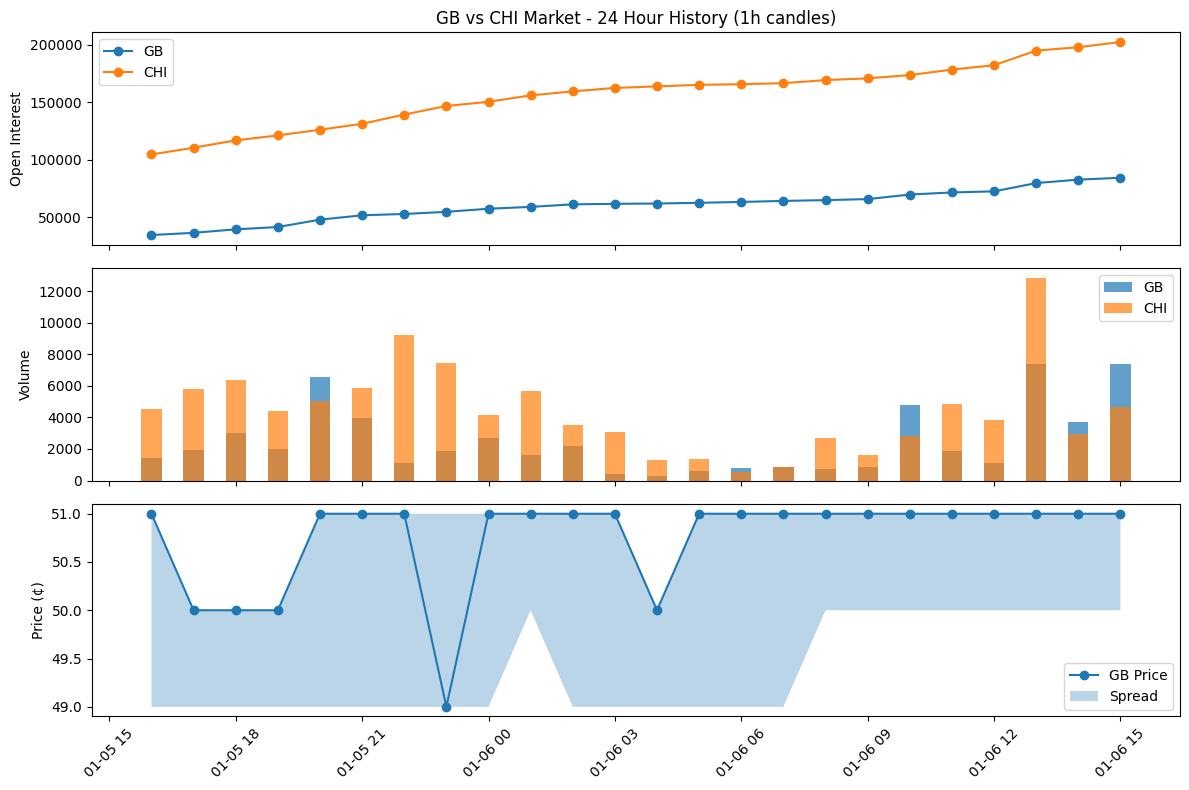

In [64]:
from datetime import datetime
import matplotlib.pyplot as plt

# Parse the candlestick data properly
def parse_candles(candles):
    parsed = []
    for c in candles:
        parsed.append({
            'time': datetime.fromtimestamp(c['end_period_ts']),
            'open_interest': c['open_interest'],
            'volume': c['volume'],
            'price_close': c['price']['close'],
            'bid_close': c['yes_bid']['close'],
            'ask_close': c['yes_ask']['close'],
            'spread': c['yes_ask']['close'] - c['yes_bid']['close']
        })
    return parsed

# Get candles for both markets
gb_candles = parse_candles(data['market_candlesticks'][1])  # GB market
chi_candles = parse_candles(data['market_candlesticks'][0])  # CHI market

# Plot open interest over time
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

times = [c['time'] for c in gb_candles]

# Open Interest
axes[0].plot(times, [c['open_interest'] for c in gb_candles], label='GB', marker='o')
axes[0].plot(times, [c['open_interest'] for c in chi_candles], label='CHI', marker='o')
axes[0].set_ylabel('Open Interest')
axes[0].legend()
axes[0].set_title('GB vs CHI Market - 24 Hour History (1h candles)')

# Volume
axes[1].bar([t for t in times], [c['volume'] for c in gb_candles], width=0.02, alpha=0.7, label='GB')
axes[1].bar([t for t in times], [c['volume'] for c in chi_candles], width=0.02, alpha=0.7, label='CHI')
axes[1].set_ylabel('Volume')
axes[1].legend()

# Price with spread
axes[2].plot(times, [c['price_close'] for c in gb_candles], label='GB Price', marker='o')
axes[2].fill_between(times, 
                      [c['bid_close'] for c in gb_candles],
                      [c['ask_close'] for c in gb_candles],
                      alpha=0.3, label='Spread')
axes[2].set_ylabel('Price (¢)')
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('candle_history.png', dpi=150)
plt.show()

# Live Test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

In [44]:
import requests
import time
from datetime import datetime
import json

# Configuration - easily changeable
SERIES = 'KXEUROLEAGUEGAME'
TICKER = 'KXEUROLEAGUEGAME-26JAN06VALCZV-CZV'
BASE_URL = "https://api.elections.kalshi.com/trade-api/v2"

def get_orderbook(ticker: str) -> dict:
    """Fetch orderbook for a market."""
    url = f"{BASE_URL}/markets/{ticker}/orderbook"
    response = requests.get(url)
    response.raise_for_status()
    return response.json()['orderbook']

def get_market_info(ticker: str) -> dict:
    """Fetch market metadata."""
    url = f"{BASE_URL}/markets/{ticker}"
    response = requests.get(url)
    response.raise_for_status()
    return response.json()['market']

def build_unified_orderbook(yes_book: list, no_book: list) -> dict:
    """Combine YES/NO books into bid/ask orderbook."""
    bids = {price: qty for price, qty in yes_book}
    asks = {(100 - price): qty for price, qty in no_book}
    return {'bids': bids, 'asks': asks}

def collect_snapshot(ticker: str) -> dict:
    """Collect a single snapshot of market state."""
    timestamp = datetime.now()
    raw_book = get_orderbook(ticker)
    book = build_unified_orderbook(raw_book['yes'], raw_book['no'])
    
    sorted_bids = sorted(book['bids'].items(), reverse=True)
    sorted_asks = sorted(book['asks'].items())
    
    best_bid = sorted_bids[0][0] if sorted_bids else None
    best_ask = sorted_asks[0][0] if sorted_asks else None
    
    return {
        'timestamp': timestamp,
        'best_bid': best_bid,
        'best_ask': best_ask,
        'mid': (best_bid + best_ask) / 2 if (best_bid and best_ask) else None,
        'spread': best_ask - best_bid if (best_bid and best_ask) else None,
        'bids': book['bids'],
        'asks': book['asks'],
    }

# Get market info
market = get_market_info(TICKER)
print(f"Market: {market['title']}")
print(f"Ticker: {TICKER}")
print(f"Status: {market['status']}")
print()

# Collect a test snapshot
snapshot = collect_snapshot(TICKER)
print(f"Snapshot at {snapshot['timestamp'].strftime('%H:%M:%S')}")
print(f"Best Bid: {snapshot['best_bid']}¢ | Best Ask: {snapshot['best_ask']}¢ | Mid: {snapshot['mid']}¢ | Spread: {snapshot['spread']}¢")
print(f"Bid levels: {len(snapshot['bids'])} | Ask levels: {len(snapshot['asks'])}")

Market: Valencia Basket at KK Crvena zvezda Belgrade Winner?
Ticker: KXEUROLEAGUEGAME-26JAN06VALCZV-CZV
Status: active

Snapshot at 14:37:41
Best Bid: 22¢ | Best Ask: 24¢ | Mid: 23.0¢ | Spread: 2¢
Bid levels: 14 | Ask levels: 23


In [50]:
# Collect snapshots over time
INTERVAL_SECONDS = 2  # How often to snapshot
DURATION_SECONDS = 300  # How long to collect (start with 1 minute for testing)

snapshots = []
print(f"Collecting snapshots every {INTERVAL_SECONDS}s for {DURATION_SECONDS}s...")
print("="*60)

start_time = time.time()
while time.time() - start_time < DURATION_SECONDS:
    try:
        snapshot = collect_snapshot(TICKER)
        snapshots.append(snapshot)
        print(f"{snapshot['timestamp'].strftime('%H:%M:%S')} | Mid: {snapshot['mid']:>5.1f}¢ | Spread: {snapshot['spread']}¢ | Bids: {sum(snapshot['bids'].values()):>8,} | Asks: {sum(snapshot['asks'].values()):>8,}")
        time.sleep(INTERVAL_SECONDS)
    except Exception as e:
        print(f"Error: {e}")
        time.sleep(INTERVAL_SECONDS)

print("="*60)
print(f"Collected {len(snapshots)} snapshots")

14:48:23 | Mid:  16.0¢ | Spread: 2¢ | Bids:   60,182 | Asks:   77,540
14:48:25 | Mid:  16.0¢ | Spread: 2¢ | Bids:   60,182 | Asks:   77,490
14:48:27 | Mid:  16.0¢ | Spread: 2¢ | Bids:   60,182 | Asks:   77,490
14:48:29 | Mid:  16.0¢ | Spread: 2¢ | Bids:   60,198 | Asks:   75,602
14:48:31 | Mid:  16.0¢ | Spread: 2¢ | Bids:   60,198 | Asks:   77,490
14:48:33 | Mid:  16.0¢ | Spread: 2¢ | Bids:   60,198 | Asks:   77,490
14:48:36 | Mid:  15.5¢ | Spread: 1¢ | Bids:   47,140 | Asks:   77,490
14:48:38 | Mid:  15.5¢ | Spread: 1¢ | Bids:   45,124 | Asks:   77,662
14:48:40 | Mid:  15.0¢ | Spread: 2¢ | Bids:   47,224 | Asks:   77,662
14:48:42 | Mid:  14.0¢ | Spread: 2¢ | Bids:   44,963 | Asks:   77,414
14:48:44 | Mid:  14.0¢ | Spread: 2¢ | Bids:   44,963 | Asks:   77,414
14:48:46 | Mid:  14.0¢ | Spread: 2¢ | Bids:   44,963 | Asks:   77,414
14:48:48 | Mid:  14.0¢ | Spread: 2¢ | Bids:   44,963 | Asks:   77,364
14:48:50 | Mid:  14.0¢ | Spread: 2¢ | Bids:   44,963 | Asks:   77,364
14:48:52 | Mid:  14.

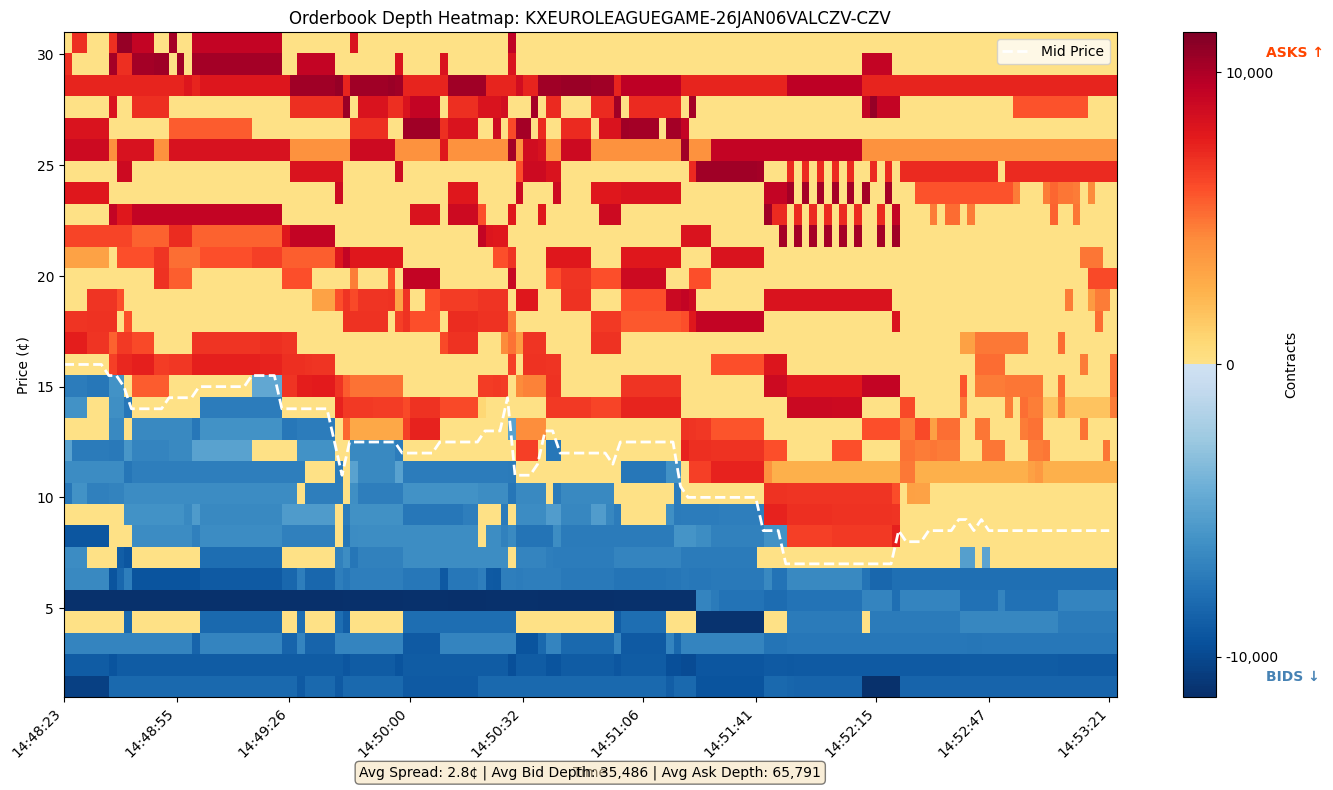

Saved to depth_heatmap.png

Snapshot Statistics:
  Time range: 14:48:23 - 14:53:21
  Price range: 1¢ - 31¢
  Mid price range: 7.0¢ - 16.0¢
  Avg spread: 2.8¢
  Max depth seen: 35,501 contracts


In [51]:


def render_depth_heatmap(snapshots: list, price_range: tuple = None, figsize: tuple = (14, 8)):
    """
    Render a depth heatmap from snapshots.
    """
    if not snapshots:
        print("No snapshots to render")
        return
    
    # Determine price range
    all_prices = set()
    for s in snapshots:
        all_prices.update(s['bids'].keys())
        all_prices.update(s['asks'].keys())
    
    if price_range:
        min_price, max_price = price_range
    else:
        mids = [s['mid'] for s in snapshots if s['mid']]
        avg_mid = sum(mids) / len(mids)
        min_price = max(1, int(avg_mid - 20))
        max_price = min(99, int(avg_mid + 20))
    
    prices = list(range(min_price, max_price + 1))
    n_times = len(snapshots)
    n_prices = len(prices)
    
    # Build heatmap matrix (raw quantities)
    heatmap_raw = np.zeros((n_prices, n_times))
    mids = []
    times = []
    
    for t_idx, snapshot in enumerate(snapshots):
        times.append(snapshot['timestamp'])
        mids.append(snapshot['mid'])
        
        for p_idx, price in enumerate(prices):
            bid_qty = snapshot['bids'].get(price, 0)
            ask_qty = snapshot['asks'].get(price, 0)
            heatmap_raw[p_idx, t_idx] = ask_qty if ask_qty > 0 else -bid_qty
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Log scale for display
    heatmap_display = np.sign(heatmap_raw) * np.log1p(np.abs(heatmap_raw))
    
    # Custom colormap
    colors_bid = plt.cm.Blues(np.linspace(0.2, 1, 128))
    colors_ask = plt.cm.YlOrRd(np.linspace(0.2, 1, 128))
    colors = np.vstack([colors_bid[::-1], colors_ask])
    cmap = LinearSegmentedColormap.from_list('bid_ask', colors)
    
    # Plot heatmap
    max_val = np.max(np.abs(heatmap_display))
    im = ax.imshow(heatmap_display, aspect='auto', cmap=cmap, 
                   vmin=-max_val, vmax=max_val,
                   extent=[0, n_times, min_price, max_price],
                   origin='lower')
    
    # Plot mid price line
    ax.plot(range(len(mids)), mids, color='white', linewidth=2, linestyle='--', label='Mid Price')
    
    # Labels
    ax.set_ylabel('Price (¢)')
    ax.set_xlabel('Time')
    ax.set_title(f'Orderbook Depth Heatmap: {TICKER}')
    
    # Format x-axis
    n_ticks = min(10, n_times)
    tick_positions = np.linspace(0, n_times-1, n_ticks, dtype=int)
    tick_labels = [times[i].strftime('%H:%M:%S') for i in tick_positions]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45, ha='right')
    
    # Colorbar with actual quantities
    cbar = plt.colorbar(im, ax=ax)
    
    # Calculate tick positions and labels for real quantities
    # We need to reverse the log transform: if display = sign(x) * log(1 + |x|), then |x| = exp(display) - 1
    max_raw = np.max(np.abs(heatmap_raw))
    
    # Choose nice round numbers for the colorbar
    def nice_ticks(max_val):
        """Generate nice round tick values."""
        if max_val < 100:
            return [10, 50, 100]
        elif max_val < 1000:
            return [100, 500, 1000]
        elif max_val < 10000:
            return [1000, 5000, 10000]
        elif max_val < 100000:
            return [10000, 50000, 100000]
        else:
            return [100000, 500000, 1000000]
    
    raw_ticks = nice_ticks(max_raw)
    raw_ticks = [t for t in raw_ticks if t <= max_raw * 1.2]  # Filter to reasonable range
    
    # Convert to display scale (log)
    display_ticks_pos = [np.log1p(t) for t in raw_ticks]
    display_ticks_neg = [-np.log1p(t) for t in raw_ticks]
    
    all_ticks = sorted(display_ticks_neg + [0] + display_ticks_pos)
    all_labels = [f'-{t:,.0f}' for t in reversed(raw_ticks)] + ['0'] + [f'{t:,.0f}' for t in raw_ticks]
    
    cbar.set_ticks(all_ticks)
    cbar.set_ticklabels(all_labels)
    cbar.set_label('Contracts')
    
    # Add bid/ask labels
    cbar.ax.text(2.5, 0.02, 'BIDS ↓', ha='left', va='bottom', transform=cbar.ax.transAxes, 
                 fontsize=10, fontweight='bold', color='steelblue')
    cbar.ax.text(2.5, 0.98, 'ASKS ↑', ha='left', va='top', transform=cbar.ax.transAxes, 
                 fontsize=10, fontweight='bold', color='orangered')
    
    ax.legend(loc='upper right')
    
    # Add summary stats as text
    avg_spread = np.mean([s['spread'] for s in snapshots if s['spread']])
    avg_bid_depth = np.mean([sum(s['bids'].values()) for s in snapshots])
    avg_ask_depth = np.mean([sum(s['asks'].values()) for s in snapshots])
    
    stats_text = f'Avg Spread: {avg_spread:.1f}¢ | Avg Bid Depth: {avg_bid_depth:,.0f} | Avg Ask Depth: {avg_ask_depth:,.0f}'
    ax.text(0.5, -0.12, stats_text, transform=ax.transAxes, ha='center', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig('depth_heatmap.png', dpi=150)
    plt.show()
    
    print(f"Saved to depth_heatmap.png")
    
    # Print some stats
    print(f"\nSnapshot Statistics:")
    print(f"  Time range: {times[0].strftime('%H:%M:%S')} - {times[-1].strftime('%H:%M:%S')}")
    print(f"  Price range: {min_price}¢ - {max_price}¢")
    print(f"  Mid price range: {min(mids):.1f}¢ - {max(mids):.1f}¢")
    print(f"  Avg spread: {avg_spread:.1f}¢")
    print(f"  Max depth seen: {max_raw:,.0f} contracts")

# Re-render with the new colorbar
render_depth_heatmap(snapshots)

In [52]:
# Let's look at the snapshots around that time period to see what happened
# Find snapshots around 14:51:00 - 14:51:41

for s in snapshots:
    time_str = s['timestamp'].strftime('%H:%M:%S')
    if '14:50:45' <= time_str <= '14:51:45':
        ask_at_10 = s['asks'].get(10, 0)
        bid_at_10 = s['bids'].get(10, 0)
        print(f"{time_str} | Mid: {s['mid']:>5.1f}¢ | Ask@10¢: {ask_at_10:>6,} | Bid@10¢: {bid_at_10:>6,}")

14:50:47 | Mid:  12.0¢ | Ask@10¢:      0 | Bid@10¢:    400
14:50:49 | Mid:  12.0¢ | Ask@10¢:      0 | Bid@10¢:    400
14:50:51 | Mid:  12.0¢ | Ask@10¢:      0 | Bid@10¢:    400
14:50:53 | Mid:  12.0¢ | Ask@10¢:      0 | Bid@10¢:    400
14:50:55 | Mid:  12.0¢ | Ask@10¢:      0 | Bid@10¢:    400
14:50:57 | Mid:  11.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:00 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:02 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:04 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:06 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:08 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:13 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:15 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:17 | Mid:  12.5¢ | Ask@10¢:      0 | Bid@10¢:    700
14:51:19 | Mid:  10.5¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:22 | Mid:  10.0¢ | Ask@10¢:      0 | Bid@10¢:      0
14:51:24 | Mid:  10.0¢ | Ask@10¢:      0 | Bid@10¢:     